## F16 Network Science
### Sean M. Shiverick 

# Praxis: Fitting power-laws to data
This assigment combines what we learned this week to fit a power-law to some data and then visualize both the power-law and the fit.

### (1) Getting the data
First, generate some data to fit to. Use degree distribution from the Barabasi-Albert graph because it is power-law distributed. Create a BA graph using networkx with `n = 2500` and `m = 8` (adjust `n` or `m` if your computer has difficulty creating the graph).

Then build a list/array of the node degrees.

In [26]:
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
G = nx.barabasi_albert_graph(2500, 8)
print(nx.info(G))

Name: barabasi_albert_graph(2500,8)
Type: Graph
Number of nodes: 2500
Number of edges: 19936
Average degree:  15.9488


In [3]:
# Build a list/array of the node degrees.

degrees = G.degree()
edges = [v for v in dict.values(degrees)]
print(edges)

[69, 136, 59, 61, 52, 57, 75, 139, 219, 204, 185, 182, 174, 173, 108, 139, 190, 159, 106, 106, 140, 92, 119, 49, 122, 105, 110, 106, 130, 89, 72, 63, 63, 76, 137, 79, 94, 97, 77, 96, 36, 66, 39, 84, 80, 72, 52, 59, 54, 41, 53, 42, 61, 82, 36, 42, 63, 76, 98, 37, 45, 43, 45, 62, 84, 25, 41, 48, 74, 47, 39, 34, 43, 24, 45, 30, 36, 19, 40, 38, 28, 42, 43, 39, 35, 23, 64, 49, 50, 44, 49, 76, 24, 54, 39, 39, 49, 23, 32, 24, 48, 36, 35, 26, 39, 34, 33, 33, 47, 32, 35, 36, 30, 49, 37, 53, 49, 41, 46, 39, 33, 65, 43, 39, 53, 41, 23, 38, 23, 18, 27, 32, 49, 29, 24, 32, 34, 42, 50, 47, 33, 32, 34, 26, 22, 23, 44, 35, 35, 25, 39, 50, 46, 48, 34, 72, 45, 27, 22, 57, 21, 35, 28, 44, 32, 26, 36, 38, 36, 52, 28, 31, 35, 13, 37, 32, 31, 45, 35, 33, 47, 37, 15, 26, 28, 34, 25, 30, 33, 36, 44, 16, 47, 29, 33, 52, 32, 23, 27, 36, 41, 28, 24, 26, 16, 35, 32, 14, 31, 37, 31, 26, 34, 27, 28, 34, 33, 14, 22, 28, 23, 24, 24, 24, 25, 29, 29, 23, 26, 31, 30, 21, 34, 30, 30, 40, 24, 28, 21, 17, 35, 35, 31, 24, 2

### (2) Find the power-law cut-off
It is normally the case in power-law distributed data that there is a value below which the power-law relation does not hold. We will express this value as `xmin`. In order to fit the scaling exponent, we first need to estimate `xmin` and then discard all values in the distribution below it.

Since calculating the optimal `xmin` can be a challenge in itself, you can use Aaron Clauset's [powerlaw](http://tuvalu.santafe.edu/~aaronc/powerlaws/) package to determine `xmin`. The package can be installed using pip from the commandline: `pip install powerlaw`

The package should then be available for import:

```
import powerlaw
```

And can be called using (see [documentation for additional arguments](http://arxiv.org/pdf/1305.0215v3.pdf)):

```
fit = powerlaw.Fit(some_data) 
print(fit.xmin)
``'

In [28]:
# Find xmin and adjust data (your code here)
import powerlaw
fit = powerlaw.Fit(edges) 
print(fit.xmin)

23.0


Calculating best minimal value for power law fit
/Users/seanshiverick/anaconda/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(array([  2.20500000e+03,   1.73000000e+02,   6.40000000e+01,
          2.40000000e+01,   8.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   8. ,   23.9,   39.8,   55.7,   71.6,   87.5,  103.4,  119.3,
         135.2,  151.1,  167. ,  182.9,  198.8,  214.7,  230.6,  246.5,
         262.4,  278.3,  294.2,  310.1,  326. ]),
 <a list of 20 Patch objects>)

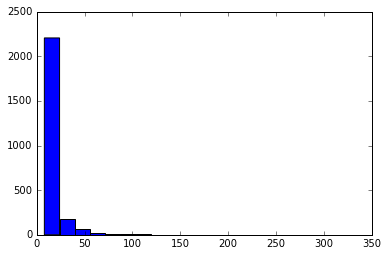

In [74]:
# Alternatively, you can get a rough estimate of cut-off by visualizing the power-law.

degree_data = [G.degree(n) for n in G]
plt.hist(degree_data, bins=20)

In [97]:
# Subset the data set for values above xmin
# Return output as a LIST

edges = np.array(edges)
cut_edges = edges[ edges > 22]
print(cut_edges)

[ 69 136  59  61  52  57  75 139 219 204 185 182 174 173 108 139 190 159
 106 106 140  92 119  49 122 105 110 106 130  89  72  63  63  76 137  79
  94  97  77  96  36  66  39  84  80  72  52  59  54  41  53  42  61  82
  36  42  63  76  98  37  45  43  45  62  84  25  41  48  74  47  39  34
  43  24  45  30  36  40  38  28  42  43  39  35  23  64  49  50  44  49
  76  24  54  39  39  49  23  32  24  48  36  35  26  39  34  33  33  47
  32  35  36  30  49  37  53  49  41  46  39  33  65  43  39  53  41  23
  38  23  27  32  49  29  24  32  34  42  50  47  33  32  34  26  23  44
  35  35  25  39  50  46  48  34  72  45  27  57  35  28  44  32  26  36
  38  36  52  28  31  35  37  32  31  45  35  33  47  37  26  28  34  25
  30  33  36  44  47  29  33  52  32  23  27  36  41  28  24  26  35  32
  31  37  31  26  34  27  28  34  33  28  23  24  24  24  25  29  29  23
  26  31  30  34  30  30  40  24  28  35  35  31  24  29  28  24  24  31
  26  26  28  28  24  26  33  25  24  23  25  24  2

## (3) Find scaling exponent
With the data available and `xmin` estimated we can now estimate the scaling exponent for our degree distribution. Use the maximum-likelihood approach to estimate the scaling exponent (see equation 3.7 from [the reading](https://iu.instructure.com/courses/1564562/files/64585579?module_item_id=15083021)).

In [98]:
# Estimate scaling exponent based on MLE (maximum likelihood estimator) for continuous data
# alpha_hat = 1 + n / sum(log(x))

alpha_hat = 1 + 2500 / sum(np.log(cut_edges))
print(alpha_hat)

# http://www.johndcook.com/blog/2015/11/24/estimating-the-exponent-of-discrete-power-law-data/

2.966753165


## (4) Visualize the power-law
Plot the CCDF of the power-law along with a best-fit line made using your estimated scaling exponent. If the fit is good, it should fall right on-top of the data-points on the CCDF plot.

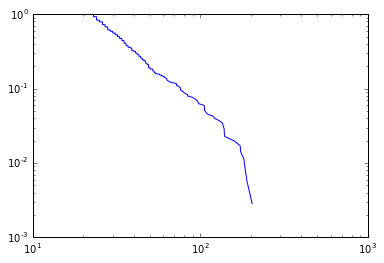

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data using the numpy sort function `np.sort()`
nums = cut_edges

sorted_distribution = np.sort(nums)

num_points = len(nums)
cumulative_density = []
for i in range(1, num_points + 1):
    cumulative_density.append( i / num_points )

# Convert cumulative_density to a numpy array to make it easier to work with
cumulative_density = np.array(cumulative_density)

ccdf = 1 - cumulative_density

X = sorted_distribution
Y = 1 - cumulative_density

plt.loglog(X,Y)

/Users/seanshiverick/anaconda/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha=  2.93924498744   sigma=  0.0969622493722


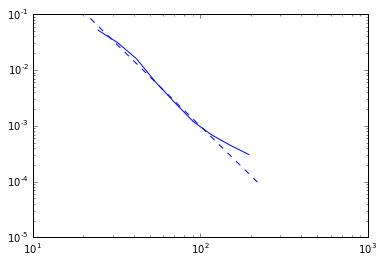

In [115]:
# Alternate approach from Stackoverflow to include the best fit line on plot

import powerlaw

fit = powerlaw.Fit(np.array(edges)+1,xmin=22,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

# http://stackoverflow.com/questions/16640496/python-plot-and-powerlaw-fit

# Using your own data
Now that you have done the fit and visualization for the BA graph, find your graph or other data and repeat the analysis. You are welcome to use data from this [graph website](http://www-personal.umich.edu/~mejn/netdata/), [Clauset's work](http://tuvalu.santafe.edu/~aaronc/powerlaws/data.htm), or from whatever real-world graphs you can find. Make sure to include the graph or data file when uploading this notebook (and avoid using a huge dataset).

The human populations of US cities in the 2000 US Census.
http://tuvalu.santafe.edu/~aaronc/powerlaws/data.htm

### (1) Getting real-world distribution

In [106]:
fname = 'cities.txt'
!head 'cities.txt'
!tail 'cities.txt'

data = [int(x) for x in open('cities.txt')]
print(data[:5], '...', data[-5:])

1
1
2
2
3
5
6
6
6
6
951270
1151305
1188589
1223429
1321190
1517550
1953633
2896047
3694742
8008654
[1, 1, 2, 2, 3] ... [1517550, 1953633, 2896047, 3694742, 8008654]


### (2) Finding cut-off

In [107]:
fit = powerlaw.Fit(data) 
print(fit.xmin)

Calculating best minimal value for power law fit
/Users/seanshiverick/anaconda/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


52457.0


In [110]:
# Subset the data set for values above xmin
# Return output as a LIST

data = np.array(data)
cut_data = data[ data > 52457]
print(cut_data)

[  52466   52524   52613   52648   52715   52717   52793   52913   52946
   52975   53054   53071   53077   53109   53127   53205   53296   53364
   53421   53505   53909   53948   54016   54059   54088   54239   54260
   54370   54514   54552   54593   54653   54749   54901   54977   54978
   55147   55245   55256   55266   55419   55502   55513   55566   55588
   55593   55635   55765   55825   55901   55919   55976   55981   56052
   56063   56255   56259   56265   56287   56340   56352   56372   56456
   56521   56646   56694   56769   56929   56933   57104   57221   57247
   57585   57695   57697   57746   57755   57870   57923   57955   58062
   58244   58264   58266   58271   58590   58596   58757   58812   58898
   58912   58969   58974   59226   59577   59684   59686   59702   59740
   59880   60032   60051   60062   60062   60213   60220   60308   60389
   60432   60448   60523   60525   60552   60578   60603   61182   61254
   61348   61607   61714   61792   61821   61842   

### (3) Estimating scaling exponent

In [112]:
alpha_hat = 1 + len(cut_edges) / sum(np.log(cut_edges))
print(alpha_hat)

# http://www.johndcook.com/blog/2015/11/24/estimating-the-exponent-of-discrete-power-law-data/

1.27613214437


### (4) Visualize power-law and best-fit

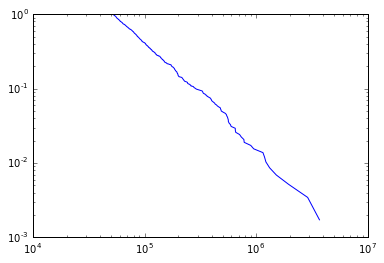

In [113]:
# Sort the data using the numpy sort function `np.sort()`
city = cut_data

sorted_distribution = np.sort(city)

num_points = len(city)
cumulative_density = []
for i in range(1, num_points + 1):
    cumulative_density.append( i / num_points )

# Convert cumulative_density to a numpy array to make it easier to work with
cumulative_density = np.array(cumulative_density)

ccdf = 1 - cumulative_density

X = sorted_distribution
Y = 1- cumulative_density

plt.loglog(X,Y)

alpha=  2.36991353877   sigma=  0.0568825635928


/Users/seanshiverick/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


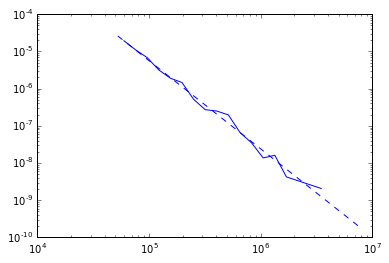

In [114]:
fit = powerlaw.Fit(np.array(data)+1,xmin=52457,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)